In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import Activation
from sklearn.preprocessing import LabelEncoder

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
def custom_activation(x, beta = 1):
        return (K.sigmoid(beta * x) * x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))
  

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/wr/wheel1.csv')

In [5]:
dataset.head(5)

,logbook_defect_id,aircraft_registration,aircraft_type_iata,flight_number,occurred_time,skywise_flight_id,environment,station,component_replaced,check_type,vendor_name,cycles_since_installation,defect_observation,Unnamed: 13
0,282450-10384,SW-K7380,380,DA459,2018-08-17T17:20:41.000Z,DA459-2017-10-26 00:12:05.718680,Heavy,LHR,Main Wheel,Service,Bridgestone,89,Patches and peeled ribs found on the wheel,NaN
1,452427-10019,SW-K7380,380,DA459,2017-12-09T19:46:49.000Z,DA459-2017-02-16 23:28:05.718680,Line,LHR,Nose Wheel,Transit,Goodyear,40,Open tread splice observed,NaN
2,456396-55148,SW-F5725,380,DA458,2018-07-24T22:45:01.000Z,DA458-2017-10-02 01:34:20.754377,Heavy,EWR,Main Wheel,Service,Michelin,35,Patches found and the length of it is beyond l...,NaN
3,467499-16509,SW-E8944,320,DA559,2018-09-20T16:57:00.000Z,DA559-2017-11-29 00:48:59.550316,Line,MUC,Main Wheel,Layover,Michelin,45,Cut marks are on the side walls of the tyre,NaN
4,794341-44907,SW-V6405,350,DA458,2017-12-04T20:15:16.000Z,DA458-2017-02-12 00:15:08.407564,Heavy,EWR,Nose Wheel,Service,Dunlop,85,Patches found and the length of it is beyond l...,NaN


In [6]:
labelencoder_X = LabelEncoder()
dataset['aircraft_registration']= labelencoder_X.fit_transform(dataset['aircraft_registration'])
print("\n",dataset['aircraft_registration'],"\n")


 0       25
1       25
2       15
3       13
4       45
        ..
2267    21
2268    12
2269    36
2270    33
2271     7
Name: aircraft_registration, Length: 2272, dtype: int64 



In [7]:
labelencoder_X = LabelEncoder()
dataset['aircraft_type_iata']= labelencoder_X.fit_transform(dataset['aircraft_type_iata'])
print("\n",dataset['aircraft_type_iata'],"\n")


 0       2
1       2
2       2
3       0
4       1
       ..
2267    2
2268    0
2269    2
2270    1
2271    2
Name: aircraft_type_iata, Length: 2272, dtype: int64 



In [8]:
labelencoder_X = LabelEncoder()
dataset['environment']= labelencoder_X.fit_transform(dataset['environment'])
print("\n",dataset['environment'],"\n")


 0       0
1       1
2       0
3       1
4       0
       ..
2267    1
2268    0
2269    0
2270    0
2271    1
Name: environment, Length: 2272, dtype: int64 



In [9]:
labelencoder_X = LabelEncoder()
dataset['component_replaced']= labelencoder_X.fit_transform(dataset['component_replaced'])
print("\n",dataset['component_replaced'],"\n")


 0       0
1       1
2       0
3       0
4       1
       ..
2267    0
2268    1
2269    1
2270    1
2271    0
Name: component_replaced, Length: 2272, dtype: int64 



In [10]:
labelencoder_X = LabelEncoder()
dataset['check_type']= labelencoder_X.fit_transform(dataset['check_type'])
print("\n",dataset['check_type'],"\n")


 0       1
1       2
2       1
3       0
4       1
       ..
2267    0
2268    1
2269    1
2270    1
2271    0
Name: check_type, Length: 2272, dtype: int64 



In [11]:
labelencoder_X = LabelEncoder()
dataset['vendor_name']= labelencoder_X.fit_transform(dataset['vendor_name'])
print("\n",dataset['vendor_name'],"\n")


 0       0
1       2
2       3
3       3
4       1
       ..
2267    0
2268    2
2269    2
2270    0
2271    3
Name: vendor_name, Length: 2272, dtype: int64 



In [12]:
labelencoder_X = LabelEncoder()
dataset['defect_observation']= labelencoder_X.fit_transform(dataset['defect_observation'])
print("\n",dataset['defect_observation'],"\n")


 0       2
1       1
2       3
3       0
4       3
       ..
2267    5
2268    3
2269    2
2270    5
2271    2
Name: defect_observation, Length: 2272, dtype: int64 



In [13]:
#Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
data1 = dataset.cycles_since_installation.values.reshape(-1, 1)
scaled_data = scaler.fit_transform(data1)

In [14]:
scaled_data.shape

(2272, 1)

In [15]:
#Checking for missing values
np.isnan(scaled_data).any()

False

In [16]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_data, SEQ_LEN, train_split = 0.80)

In [17]:
X_train.shape

(1737, 99, 1)

In [18]:
X_test.shape

(435, 99, 1)

## **Adam Optimizer and ReLU activation function**

In [19]:
np.random.seed(42)
window_len = 5
zero_base = True
dropout = 0.2
output_size=1

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = Sequential()
model.add(Convolution1D(64, 3, padding="same", input_shape = (X_train.shape[1], 1)))
model.add(Convolution1D(128, 3, padding="same", input_shape = (X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(LSTM(100, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2]),))
model.add(Dense(units=output_size))
model.compile(loss='mse', optimizer='adam')

In [20]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False, validation_split=0.20)

Epoch 1/20
22/22 [==============================] - 4s 104ms/step - loss: 0.1138 - val_loss: 0.0890
Epoch 2/20
22/22 [==============================] - 2s 89ms/step - loss: 0.0920 - val_loss: 0.0880
Epoch 3/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0913 - val_loss: 0.0876
Epoch 4/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0910 - val_loss: 0.0876
Epoch 5/20
22/22 [==============================] - 2s 85ms/step - loss: 0.0909 - val_loss: 0.0875
Epoch 6/20
22/22 [==============================] - 2s 86ms/step - loss: 0.0908 - val_loss: 0.0874
Epoch 7/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0907 - val_loss: 0.0873
Epoch 8/20
22/22 [==============================] - 2s 88ms/step - loss: 0.0907 - val_loss: 0.0872
Epoch 9/20
22/22 [==============================] - 3s 126ms/step - loss: 0.0907 - val_loss: 0.0869
Epoch 10/20
22/22 [==============================] - 4s 171ms/step - loss: 0.0906 - val_loss: 0.0868
Epoch 

**MSE**

In [21]:
predicteddata = model.predict(X_test)
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.0912


0.09115797281265259

**RMSE**

In [22]:
mse = mean_squared_error(y_test, predicteddata)
print('Test set: Root Squared Mean Error', np.sqrt(mse))
#print(f"r2 Score Of Test Set : {r2_score(y_test, predicteddata)}")

Test set: Root Squared Mean Error 0.3019237952942374


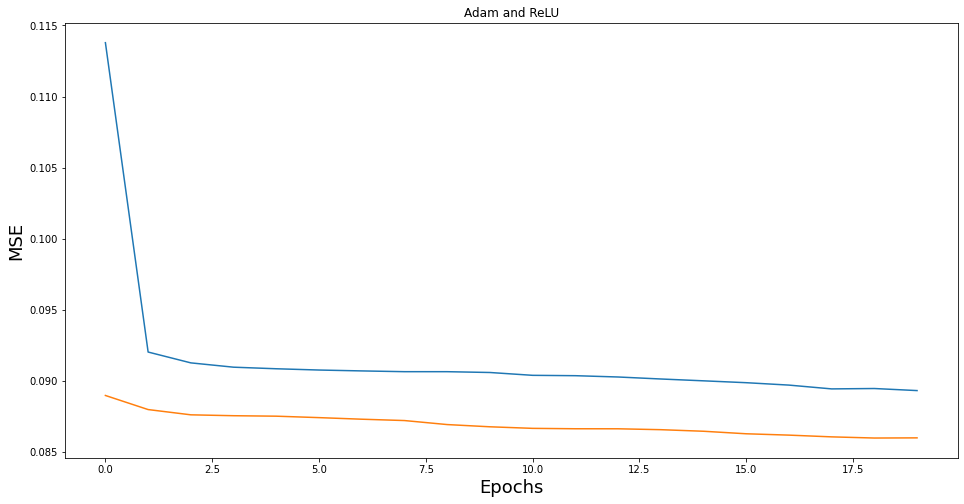

In [23]:
configure_plotly_browser_state()
plt.figure(figsize=(16,8))
plt.title('Adam and ReLU')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.show()

## **Adam Optimizer and Swish activation Function**

In [24]:
model = Sequential()
model.add(Convolution1D(64, 3, padding="same",input_shape = (X_train.shape[1], 1)))
model.add(Convolution1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(LSTM(100, Activation(custom_activation,name = "Swish"), input_shape=(X_train.shape[1], X_train.shape[2]),))
model.add(Dense(units=output_size))
model.compile(loss='mse', optimizer='adam')

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False, validation_split=0.20)

Epoch 1/20
22/22 [==============================] - 4s 105ms/step - loss: 0.1305 - val_loss: 0.0887
Epoch 2/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0927 - val_loss: 0.0880
Epoch 3/20
22/22 [==============================] - 2s 89ms/step - loss: 0.0914 - val_loss: 0.0881
Epoch 4/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0911 - val_loss: 0.0880
Epoch 5/20
22/22 [==============================] - 2s 89ms/step - loss: 0.0910 - val_loss: 0.0878
Epoch 6/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0908 - val_loss: 0.0877
Epoch 7/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0907 - val_loss: 0.0877
Epoch 8/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0906 - val_loss: 0.0876
Epoch 9/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0905 - val_loss: 0.0876
Epoch 10/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0905 - val_loss: 0.0876
Epoch 11

**MSE**

In [26]:
predicteddata = model.predict(X_test)
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 16ms/step - loss: 0.0922


0.09220157563686371

**RMSE**

In [27]:
mse = mean_squared_error(y_test, predicteddata)
print('Test set: Root Squared Mean Error', np.sqrt(mse))

Test set: Root Squared Mean Error 0.3036471187632952


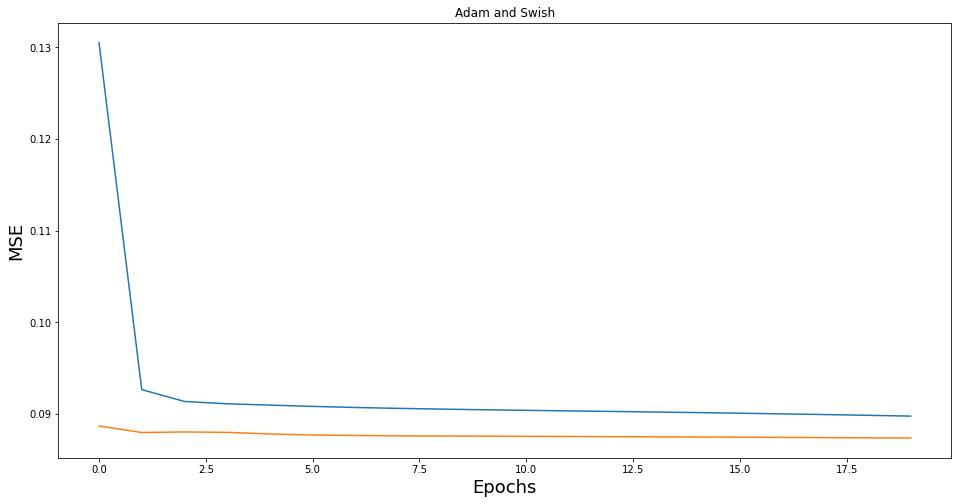

In [28]:
configure_plotly_browser_state()
plt.figure(figsize=(16,8))
plt.title('Adam and Swish')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.show()

## **Nadam optimizer and ReLU activation function**

In [29]:
model = Sequential()
model.add(Convolution1D(64, 3, padding="same", input_shape = (X_train.shape[1], 1)))
model.add(Convolution1D(128, 3, padding="same", input_shape = (X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(LSTM(100,activation="relu", input_shape=(X_train.shape[1], X_train.shape[2]),))
model.add(Dense(units=output_size))
model.compile(loss='mse', optimizer='nadam')

In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False, validation_split=0.20)

Epoch 1/20
22/22 [==============================] - 5s 102ms/step - loss: 0.1157 - val_loss: 0.0877
Epoch 2/20
22/22 [==============================] - 3s 122ms/step - loss: 0.0928 - val_loss: 0.0876
Epoch 3/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0925 - val_loss: 0.0875
Epoch 4/20
22/22 [==============================] - 2s 86ms/step - loss: 0.0922 - val_loss: 0.0875
Epoch 5/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0920 - val_loss: 0.0875
Epoch 6/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0918 - val_loss: 0.0876
Epoch 7/20
22/22 [==============================] - 2s 89ms/step - loss: 0.0917 - val_loss: 0.0876
Epoch 8/20
22/22 [==============================] - 2s 88ms/step - loss: 0.0915 - val_loss: 0.0876
Epoch 9/20
22/22 [==============================] - 2s 91ms/step - loss: 0.0914 - val_loss: 0.0877
Epoch 10/20
22/22 [==============================] - 2s 92ms/step - loss: 0.0913 - val_loss: 0.0877
Epoch 1

**MSE**

In [31]:
predicteddata = model.predict(X_test)
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 18ms/step - loss: 0.0936


0.09362345933914185

**RMSE**

In [32]:
mse = mean_squared_error(y_test, predicteddata)
print('Test set: Root Squared Mean Error', np.sqrt(mse))

Test set: Root Squared Mean Error 0.305979507363029


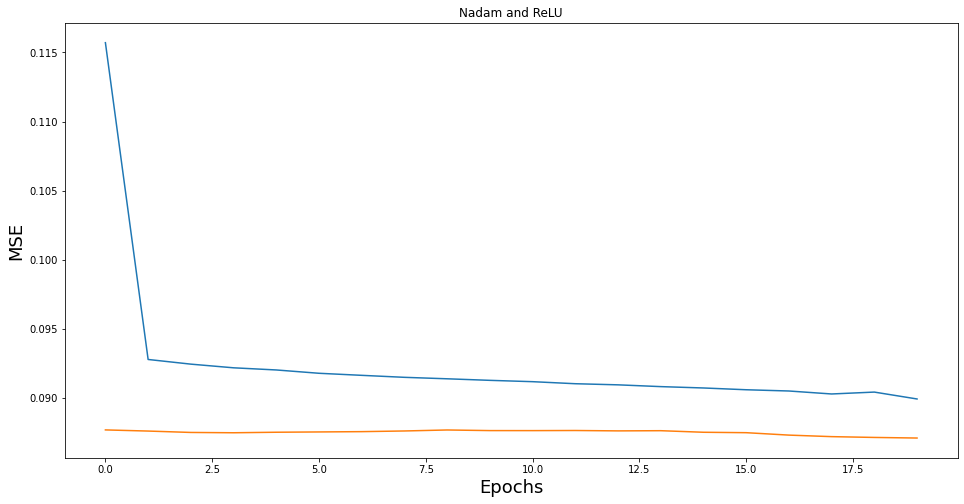

In [33]:
configure_plotly_browser_state()
plt.figure(figsize=(16,8))
plt.title('Nadam and ReLU')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.show()

In [34]:
clvp=pd.DataFrame(predicteddata)
yv=pd.DataFrame(y_test)
display_side_by_side(yv.head(9)*100,clvp.head(9)*100, titles=['Actual','Predicted'])

,0
0,86.666667
1,53.333333
2,48.333333
3,95.000000
4,1.666667
5,60.000000
6,46.666667
7,26.666667
8,40.000000
,0


## **NADAM Optimizer and SWISH Activation function**

In [35]:
model = Sequential()
model.add(Convolution1D(64, 3, padding="same",input_shape = (X_train.shape[1], 1)))
model.add(Convolution1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(LSTM(100, Activation(custom_activation,name = "Swish"), input_shape=(X_train.shape[1], X_train.shape[2]),))
model.add(Dense(units=output_size))
model.compile(loss='mse', optimizer='nadam')

In [36]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False, validation_split=0.20)

Epoch 1/20
22/22 [==============================] - 5s 107ms/step - loss: 0.1358 - val_loss: 0.0886
Epoch 2/20
22/22 [==============================] - 2s 93ms/step - loss: 0.0924 - val_loss: 0.0879
Epoch 3/20
22/22 [==============================] - 2s 92ms/step - loss: 0.0922 - val_loss: 0.0877
Epoch 4/20
22/22 [==============================] - 2s 94ms/step - loss: 0.0920 - val_loss: 0.0876
Epoch 5/20
22/22 [==============================] - 2s 94ms/step - loss: 0.0918 - val_loss: 0.0876
Epoch 6/20
22/22 [==============================] - 2s 91ms/step - loss: 0.0917 - val_loss: 0.0876
Epoch 7/20
22/22 [==============================] - 2s 91ms/step - loss: 0.0916 - val_loss: 0.0876
Epoch 8/20
22/22 [==============================] - 2s 92ms/step - loss: 0.0914 - val_loss: 0.0876
Epoch 9/20
22/22 [==============================] - 2s 93ms/step - loss: 0.0913 - val_loss: 0.0876
Epoch 10/20
22/22 [==============================] - 2s 90ms/step - loss: 0.0912 - val_loss: 0.0876
Epoch 11

**MSE**

In [37]:
predicteddata = model.predict(X_test)
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 16ms/step - loss: 0.0928


0.0927758514881134

**RMSE**

In [38]:
mse = mean_squared_error(y_test, predicteddata)
print('Test set: Root Squared Mean Error', np.sqrt(mse))

Test set: Root Squared Mean Error 0.30459129599631685


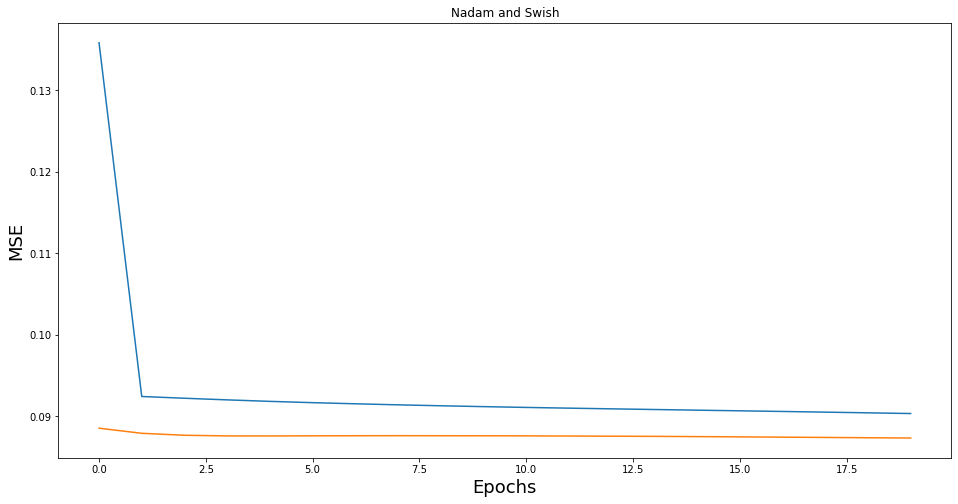

In [39]:
configure_plotly_browser_state()
plt.figure(figsize=(16,8))
plt.title('Nadam and Swish')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.show()

In [40]:
clvp=pd.DataFrame(predicteddata)
yv=pd.DataFrame(y_test)
display_side_by_side(yv.head(10)*100,clvp.head(10)*100, titles=['Actual','Predicted'])

,0
0,86.666667
1,53.333333
2,48.333333
3,95.000000
4,1.666667
5,60.000000
6,46.666667
7,26.666667
8,40.000000
9,5.000000
